In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

adv = pd.read_csv("Advertising.csv")
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


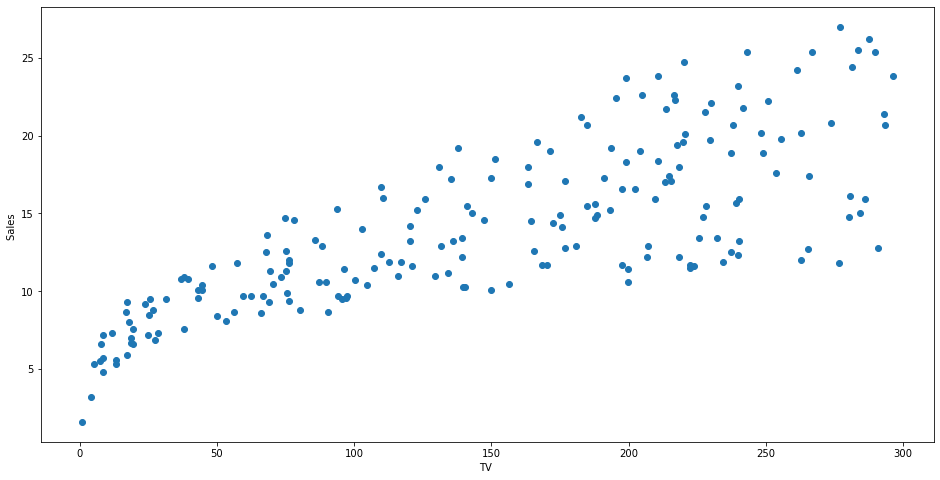

In [2]:
#check for nulls in the data
adv.isnull().sum() 
plt.figure(figsize=(16, 8))
plt.scatter(
adv['TV'],
adv['sales']
)
plt.xlabel("TV ")
plt.ylabel("Sales ")
plt.show()

In [3]:
x = adv['TV'].values.reshape(-1,1)
y = adv['sales'].values.reshape(-1,1)

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#fit the model using Linear Regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)


print("INTERCEPT: ", linreg.intercept_[0])          #Intercept
print("\nCOEFFICIENT: ", linreg.coef_[0][0])          #Coefficient
print("\nThe linear model is: y = {:.5} + {:.5}TV".format(linreg.intercept_[0], linreg.coef_[0][0]))

# Make predictions using the testing set
y_pred = linreg.predict(x_test)
y=linreg.predict(np.array([1000]).reshape(1,-1))         #Prediction
print("\nPredicted Value for the SALES of TV: ", y)


#Accuracy Score
print("\nAccuracy Score: ", linreg.score(x_test,y_test))
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

INTERCEPT:  7.310810165411684

COEFFICIENT:  0.04581434217189621

The linear model is: y = 7.3108 + 0.045814TV

Predicted Value for the SALES of TV:  [[53.12515234]]

Accuracy Score:  0.725606346597073
Mean Squared Error : 7.497479593464676
Root Mean Squared Error : 2.738152587688399


In [4]:
print('Train Score :', linreg.score(x_train,y_train))
print('Test Score:', linreg.score(x_test,y_test))

Train Score : 0.5552336104251211
Test Score: 0.725606346597073


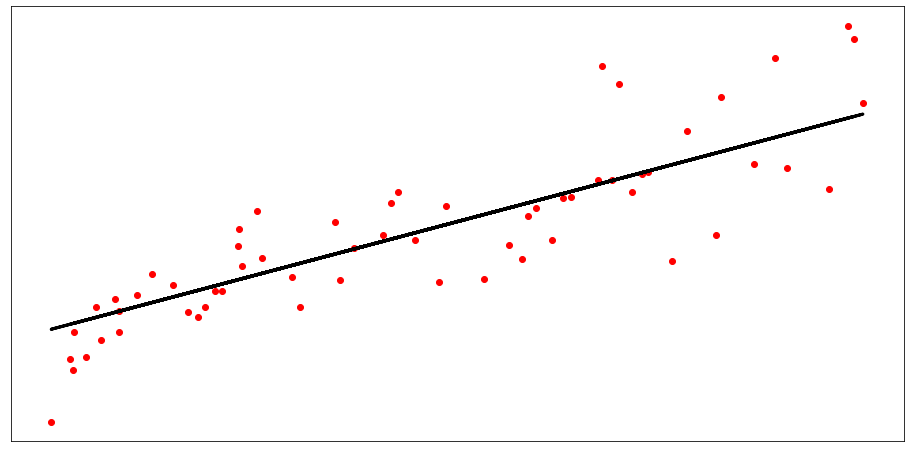

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, y_pred, color="black", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

C:\Users\sawar\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


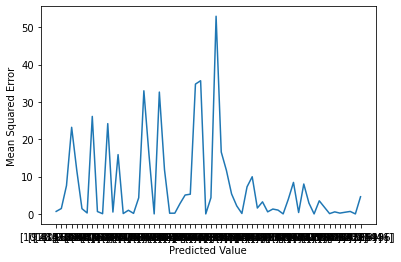

In [6]:
errors = list()
for i in range(len(y_test)):
    # calculate error
    err = (y_test[i] - y_pred[i])**2
    # store error
    errors.append(err)
    
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()